In [32]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Daniel Ho\DFE-DATA4\DFE Data Engineering Next Steps\scikit_data\boston.csv')

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
'''
We are doing to use 80% of the data to train the model, 20% to test the model.

We save this to two objects, a training dataset and a testing dataset.
'''
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [35]:
df.shape

(506, 14)

In [36]:
train_df.shape

(404, 14)

In [37]:
test_df.shape

(102, 14)

In [38]:
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train.shape

(404, 13)

In [41]:
y_train.shape

(404,)

In [42]:
'''
We can now use a linear regression model to fit our training data.
'''

from sklearn.linear_model import LinearRegression
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [43]:
'''
The closer to 1 for the r-squared figure, the better the model fits.
'''

r2_score = round(reg_all.score(X_train, y_train), 4)
print(f'r2 training score is {r2_score}')

r2 training score is 0.7509


In [44]:
'''
So the model has learnt some patterns and we need to check these patterns against the test data.
'''

y_pred = reg_all.predict(X_test)

In [45]:
'''
We need to compare if the predictions from the model to the actual outcomes using the test data.
'''

r2_score_test = round(reg_all.score(X_test, y_test), 4)

In [46]:
r2_score_test

0.6688

In [47]:
'''
We can use different metrics to see how good the model is.
i.e. mean square error - a risk metric corresponding to the expected value of the squared (quadratic) error or loss.

The close it is to zero, the better the model fit.

https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error
'''

from sklearn.metrics import mean_squared_error
import numpy as np

np.sqrt(mean_squared_error(y_test, y_pred))

4.928602182665318

In [48]:
'''
We need to check the errors the model made in the prediction.
'''
error = y_test - y_pred

In [49]:
'''
We should get the same result as the mean_squared_error using the following line:
'''
np.sqrt(np.mean(error ** 2))

4.928602182665318

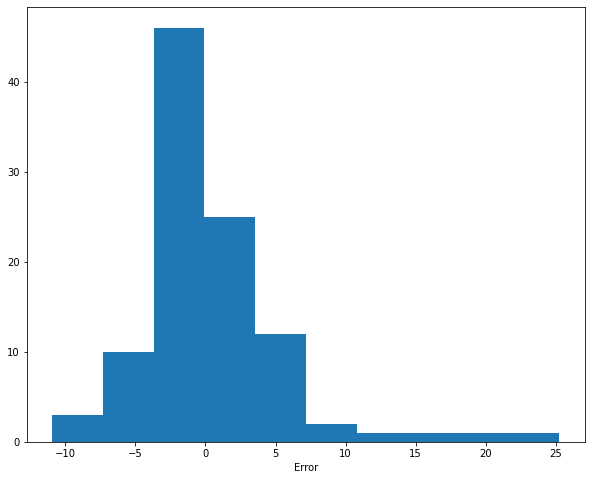

In [50]:
'''
To check the distribution of the error, produce a plot that allows us to understand how our model performs,
then check how the actuals versus predicted values with another plot.

The below graph shows peak observations of the errors between -5 and +5, and the maximum around 0.
But there it still can be improved as there are still errors towards the tail end of the distribution.
'''

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(error)
ax.set_xlabel('Error')
plt.show()

<AxesSubplot:>

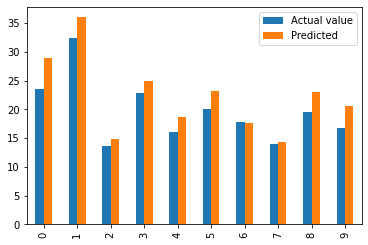

In [51]:
'''
The below graph shows the actual versus predicted.

The model is over-predicting for the first 10 rows.
'''

data_pred_df = pd.DataFrame({'Actual value': y_test, 'Predicted': y_pred}).reset_index(drop=True)
data_pred_df.head(10).plot(kind='bar')

<AxesSubplot:>

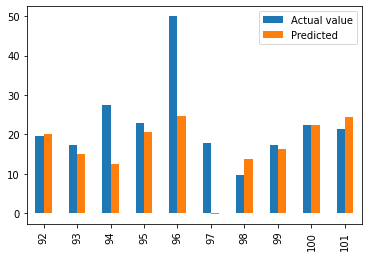

In [52]:
'''
However the model is not a great fit on the last 10 rows.
Predicted values are lower than actual values.
'''
data_pred_df.tail(10).plot(kind='bar')

Text(0, 0.5, 'Predicted value')

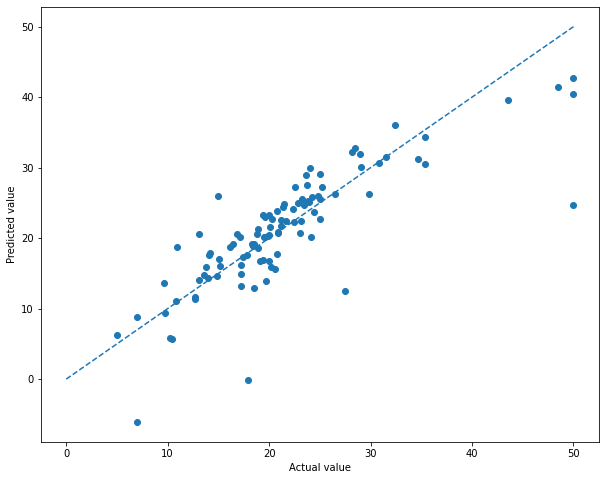

In [53]:
'''
A scatter graph of actual versus predicted will show a better understanding.
The dotted line is a line from (0,0) to (50,50).
The dependence is the relationship between actual values and predicted values.

From looking at the graph, is the training score (r2 score) of 0.75 good?
This will depend on the strategies used.
Deploying 80/20 (training/test) is arbitrary choice but it is dependent on the way we split the data.
Splitting the data with a different strategy will change the training score.
There will be some bias in the way the data is split and we need to avoid bias as much as possible.
'''

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(y_test, y_pred)
ax.plot([0,50], [0,50], linestyle='--')
ax.set_xlabel('Actual value')
ax.set_ylabel('Predicted value')

In [54]:
'''
Using Cross-Validation can help eliminate bias.
Instead of splitting the data into training/testing in one go,
The original data is split into K-folds and this procedure is repeated so that each single data point is going to be a test data during the training phase.

          |--------|--------|--------|--------|--------|
          | FOLD 1 | FOLD 2 | FOLD 3 | FOLD 4 | FOLD 5 |
|---------|--------|--------|--------|--------|--------|
| Split 1 | TEST 1 | Fold 2 | Fold 3 | Fold 4 | Fold 5 |
|---------|--------|--------|--------|--------|--------|
| Split 2 | Fold 1 | TEST 2 | Fold 3 | Fold 4 | Fold 5 |
|---------|--------|--------|--------|--------|--------|
| Split 3 | Fold 1 | Fold 2 | TEST 3 | Fold 4 | Fold 5 |
|---------|--------|--------|--------|--------|--------|
| Split 4 | Fold 1 | Fold 2 | Fold 3 | TEST 4 | Fold 5 |
|---------|--------|--------|--------|--------|--------|
| Split 5 | Fold 1 | Fold 2 | Fold 3 | Fold 4 | TEST 5 |
|---------|--------|--------|--------|--------|--------|

Split 1
Training using fold 2, fold 3, fold 4, fold 5 
Test using fold 1

Split 2
Training using fold 1, fold 3, fold 4, fold 5 
Test using fold 2

etc.

This produces 5 different scores which can be mean averaged to produce the performance of the model.

The algorithm is less dependent on the split and each data point is in the test set once.

Cross validation maximises the data that is used to train the model.
And during the course of training the model, it is also tested on all available data.
Once you have the parameters you are still able to test the data as we did previously.

The score is more stable and less dependent on the original split of data.
'''

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(reg_all, X_train, y_train, cv=10)

In [55]:
'''
Each single score was obtained using different folds at each single step and therefore the numbers are different across steps.

There are 10 different scores because we used 10 cross validation splits.
'''
cv_scores

array([0.78005109, 0.79231329, 0.75452641, 0.29904458, 0.78702938,
       0.72324517, 0.84606865, 0.66835141, 0.79974401, 0.5362705 ])

In [56]:
cv_scores.mean()

0.6986644490108911

In [59]:
'''
Performing cross-validation on a linear regression for different numbers of cross validation splits:
'''
metrics_df = pd.DataFrame()
for elem in [5, 8, 10, 15, 20]:
    cv_scores = cross_val_score(reg_all, X_train, y_train, cv=elem)
    temp_df = pd.DataFrame()
    temp_df['cv'] = [elem]
    temp_df['avg_score'] = [cv_scores.mean()]
    metrics_df = metrics_df.append(temp_df).reset_index(drop=True)

In [60]:
'''
There is not much significant differences between the original linear regression, there is an actual decrease in the average score of the cross-validation.
This makes sense since the larger number of splits, the smaller the data in each fold.

If each fold contains one single data point, it is very risky since the test gets one observation during cross-validation.
Therefore it is important to find a good balance between the number of elements inside each fold versus the number of folds specified.
Typically a number between 5 and 10 is a good choice as larger values will slow the working memory.
'''
metrics_df

,cv,avg_score
0,5,0.724436
1,8,0.723505
2,10,0.698664
3,15,0.705553
4,20,0.682848
